In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [48]:
df =pd.read_csv('datasets/NFLX.csv')
print(df.head(6))
print(df.shape)

         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
5  2018-02-12  252.139999  259.149994  249.000000  257.950012  257.950012   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  
5   8534900  
(1009, 7)


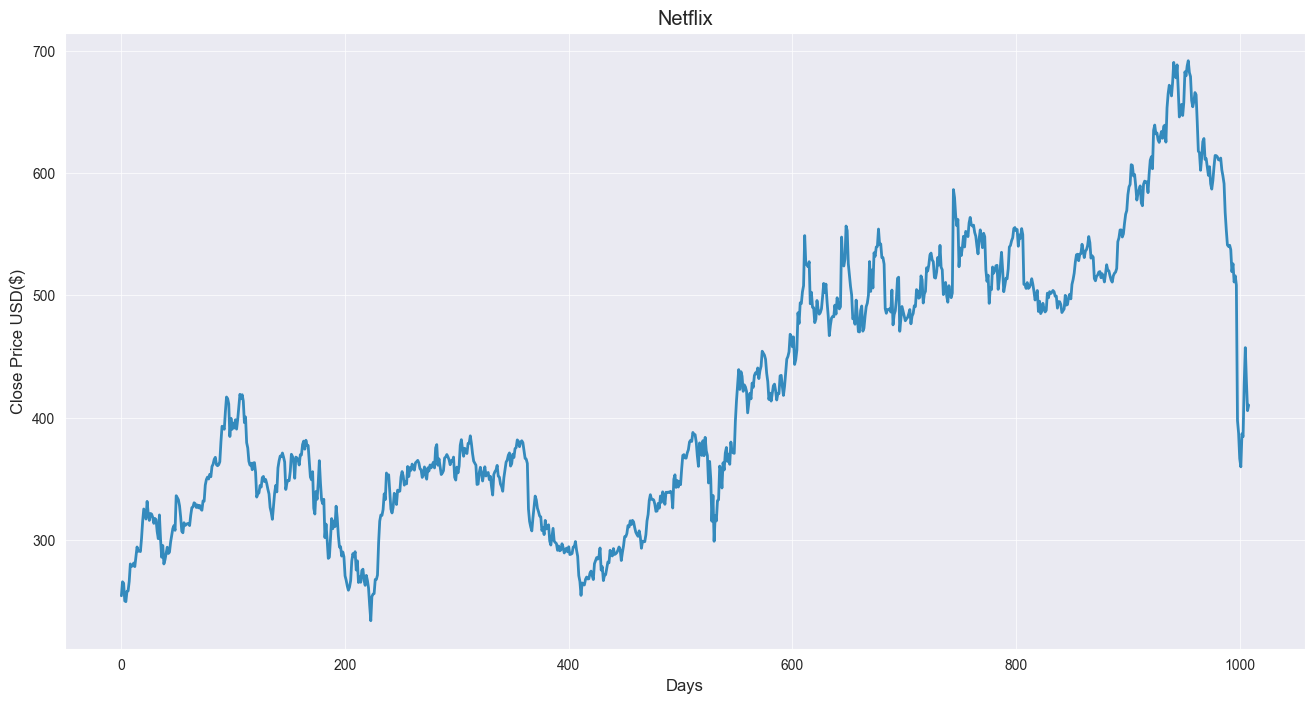

In [49]:
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.show()

In [50]:
df = df[['Close']]
print(df.head(4))

        Close
0  254.259995
1  265.720001
2  264.559998
3  250.100006


In [51]:
future_days = 50

df['Prediction'] = df[['Close']].shift(-future_days)
print(df.head(4))
print(df.tail(4))


        Close  Prediction
0  254.259995  334.519989
1  265.720001  332.700012
2  264.559998  327.769989
3  250.100006  318.690002
           Close  Prediction
1005  457.130005         NaN
1006  429.480011         NaN
1007  405.600006         NaN
1008  410.170013         NaN


In [52]:
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(x)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [9]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[334.519989 332.700012 327.769989 318.690002 307.019989 305.76001
 313.980011 311.76001  312.459991 313.299988 313.359985 311.690002
 320.089996 326.26001  326.890015 330.299988 329.600006 326.459991
 328.529999 326.130005 328.190002 325.220001 324.179993 331.820007
 331.619995 344.720001 349.290009 351.290009 349.730011 353.540009
 351.600006 359.929993 361.809998 365.799988 367.450012 361.399994
 360.570007 361.450012 363.829987 379.929993 392.869995 391.980011
 390.399994 404.980011 416.76001  415.440002 411.089996 384.480011
 399.390015 390.390015 395.420013 391.429993 398.179993 390.519989
 398.390015 408.25     418.970001 415.630005 418.649994 413.5
 395.799988 400.480011 379.480011 375.130005 364.230011 361.049988
 362.660004 357.320007 362.869995 363.089996 355.209991 334.959991
 337.450012 338.380005 344.5      343.089996 350.920013 351.829987
 347.609985 349.359985 345.869995 341.309998 337.48999  326.399994
 322.440002 316.779999 327.730011 338.019989 344.440002 339.170013
 

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [11]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [12]:
lr = LinearRegression().fit(x_train, y_train)

In [13]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(x_future)

[[582.869995]
 [586.5     ]
 [589.349976]
 [575.429993]
 [573.140015]
 [590.650024]
 [593.26001 ]
 [592.390015]
 [592.640015]
 [583.849976]
 [599.059998]
 [610.340027]
 [613.150024]
 [603.349976]
 [634.809998]
 [639.099976]
 [631.849976]
 [632.659973]
 [627.039978]
 [624.940002]
 [629.76001 ]
 [633.799988]
 [628.289978]
 [637.969971]
 [639.      ]
 [625.140015]
 [653.159973]
 [664.780029]
 [671.659973]
 [668.52002 ]
 [662.919983]
 [674.049988]
 [690.309998]
 [681.169983]
 [677.719971]
 [688.289978]
 [668.400024]
 [645.719971]
 [651.450012]
 [655.98999 ]
 [646.909973]
 [657.580017]
 [682.609985]
 [679.330017]
 [687.400024]
 [691.690002]
 [682.02002 ]
 [678.799988]
 [659.200012]
 [654.059998]]


C:\Users\prite\AppData\Local\Temp\ipykernel_260816\690020336.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'], 1)[:-future_days]


In [14]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print ()


[657.580017 539.419983 659.200012 641.900024 641.900024 616.469971
 602.130005 612.690002 625.580017 628.080017 611.       611.659973
 604.559998 597.98999  613.119995 591.059998 586.72998  593.73999
 604.919983 614.23999  586.72998  613.119995 604.919983 591.059998
 591.059998 602.440002 597.369995 591.150024 567.52002  553.289978
 541.059998 539.849976 540.840027 537.219971 429.480011 525.690002
 553.289978 515.859985 597.369995 397.5      515.859985 397.5
 359.700012 386.700012 384.359985 427.140015 457.130005 429.480011
 405.600006 597.369995]


In [15]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[568.33936907 571.40593438 573.81354471 562.05418434 560.11965062
 574.91180272 577.11667366 576.38171696 576.59291263 569.16724004
 582.01640299 591.54557597 593.91941273 585.64050204 612.21738333
 615.84148239 609.71680805 610.40107948 605.65340511 603.87938179
 607.951241   611.36414439 606.70938345 614.88687375 615.7570244
 604.0483493  627.71912415 637.53554605 643.34760349 640.69502562
 635.96421143 645.36664674 659.10282135 651.3814951  648.46698476
 657.39634347 640.59365508 621.43393942 626.27457874 630.10987346
 622.43923248 631.45310071 652.59798383 649.82712372 656.64452575
 660.26862481 652.09959163 649.37936441 632.82164441 628.47944967]


C:\Users\prite\AppData\Local\Temp\ipykernel_260816\2327781411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Predictions


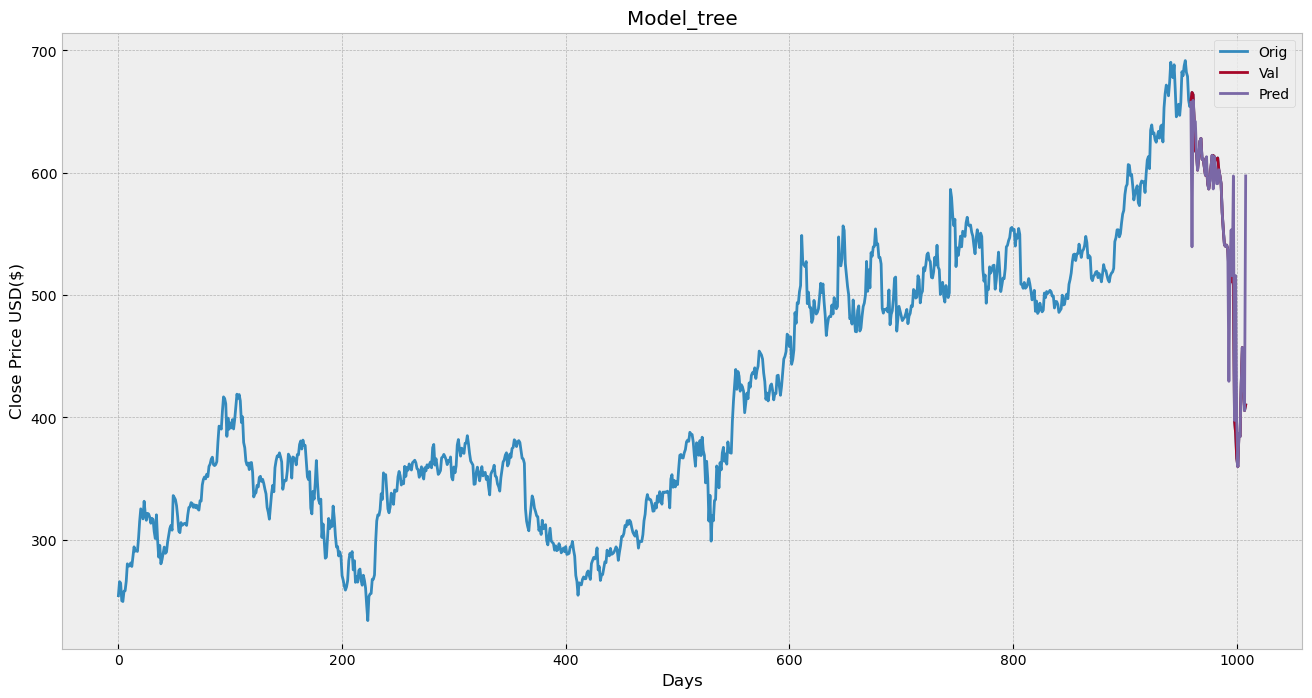

In [16]:
Predictions = tree_prediction
valid = df[x.shape[0]:]
valid['Prediction'] = Predictions
plt.figure(figsize=(16,8))
plt.title('Model_tree')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

C:\Users\prite\AppData\Local\Temp\ipykernel_260816\3741327825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Predictions


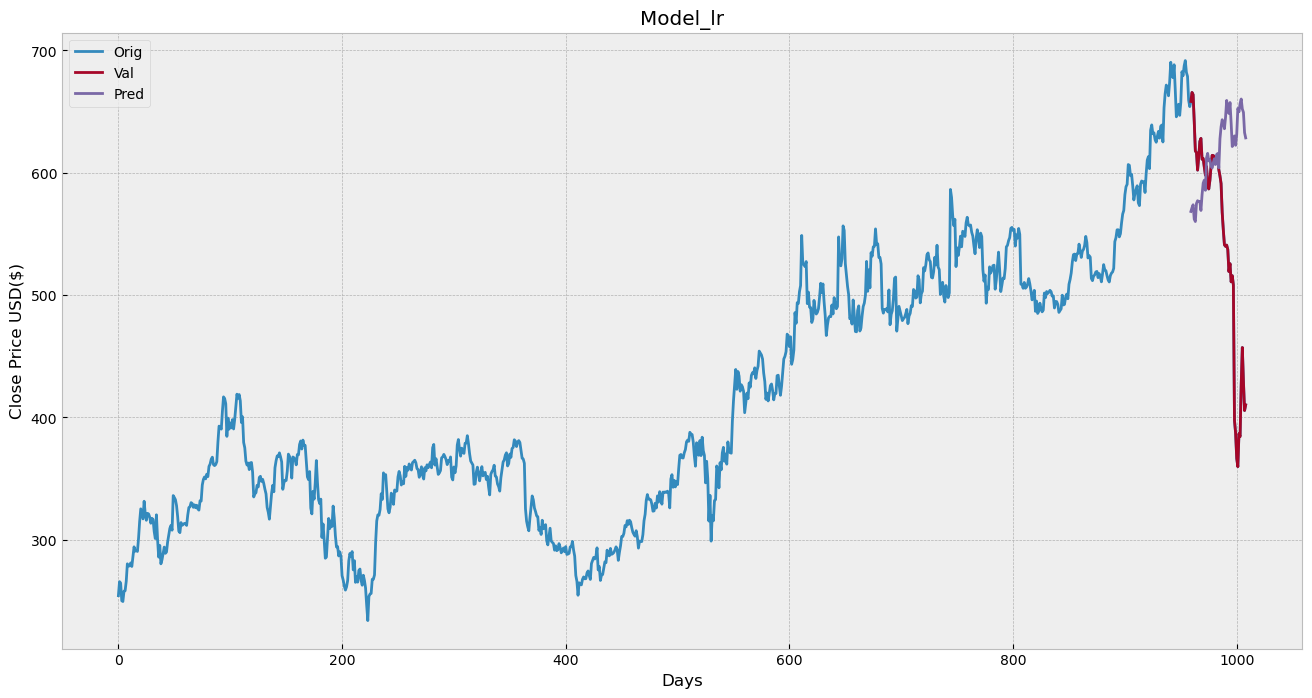

In [17]:
Predictions = lr_prediction
valid = df[x.shape[0]:]
valid['Prediction'] = Predictions
plt.figure(figsize=(16,8))
plt.title('Model_lr')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()